# ANN & MNIST : exercise

## 라이브러리 불러오기

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import random as rd

from sklearn.metrics import accuracy_score

## 데이터 불러오기

In [2]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
train_x.shape, train_y.shape, test_x.shape, test_y.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [4]:
train_x[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

id = 0
다음 그림은 숫자 5 입니다.


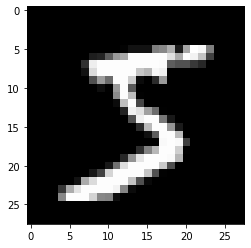

In [5]:
'''
Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

# id = rd.randrange(0,10000)
id = 0

print(f'id = {id}')
print(f'다음 그림은 숫자 {train_y[id]} 입니다.')

plt.imshow(train_x[id], cmap='gray')
plt.show()

## 데이터 전처리

* reshape

In [6]:
train_x = train_x.reshape([train_x.shape[0], -1])
test_x = test_x.reshape([test_x.shape[0], -1])

In [7]:
train_x.shape

(60000, 784)

* min-max scaling

In [8]:
max_num = train_x.max()

train_x = train_x/max_num
test_x = test_x/max_num
# train_x = (train_x - min_n) / (max_n - min_n) -> 엄밀히 말하면 이렇게 해야 함 하지만 min값이 0이라 그냥 생략 
# test_x = (test_x - min_n) / (max_n - min_n)

In [24]:
train_x.max(), train_x.min()

(1.0, 0.0)

* target feature : One-hot Encoding

In [10]:
from tensorflow.keras.utils import to_categorical

len_y = len(set(train_y))

train_y = to_categorical(train_y, len_y)
test_y = to_categorical(test_y, len_y)

## 모델링 I

1. Sequential, Functional 아무 것이나!
2. 히든레이어 없이 epochs=50 으로 성능 관찰.
3. activation, loss 설정
4. Early Stopping

In [11]:
train_x.shape, train_y.shape

((60000, 784), (60000, 10))

In [13]:
########################
# 모델링 I : .fit( ) 까지!
########################

# 1. 세션 클리어
keras.backend.clear_session()

# 2. 레이어 사슬 엮기
il = keras.layers.Input(shape=(784,))
ol = keras.layers.Dense(10, activation='softmax')(il)

# 3. 모델 생성
model = keras.models.Model(il, ol)

# 4. 모델 컴파일
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# 5. 모델 학습
model.fit(train_x, train_y, epochs=50, verbose=1)

Epoch 1/50
1875/1875 [==============================] - 6s 2ms/step - loss: 0.4660 - accuracy: 0.8773
Epoch 2/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3040 - accuracy: 0.9152
Epoch 3/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2834 - accuracy: 0.9206
Epoch 4/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2733 - accuracy: 0.9235
Epoch 5/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2666 - accuracy: 0.9260
Epoch 6/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2619 - accuracy: 0.9280
Epoch 7/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2583 - accuracy: 0.9285
Epoch 8/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2556 - accuracy: 0.9294
Epoch 9/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2532 - accuracy: 0.9298
Epoch 10/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.251

In [ ]:
# 1. 세션 클리어
clear_session()

# 2. 모델 발판 선언
model = Sequential()

# 3. 레이어 블록 조립
model.add(Input(shape=(28, 28)))
model.add(Flatten())
model.add(Dense(1, activation='softmax'))

# 4. 모델 컴파일
model.compile(loss='sparse_categorical_crossentropy')

In [14]:
pred_train = model.predict(train_x)
pred_test = model.predict(test_x)

single_pred_train = pred_train.argmax(axis=1)
single_pred_test = pred_test.argmax(axis=1)

logi_train_accuracy = accuracy_score(train_y.argmax(axis=1), single_pred_train)
logi_test_accuracy = accuracy_score(test_y.argmax(axis=1), single_pred_test)

print('트레이닝 정확도 : {:.2f}%'.format(logi_train_accuracy*100))
print('테스트 정확도 : {:.2f}%'.format(logi_test_accuracy*100))

트레이닝 정확도 : 93.82%
테스트 정확도 : 92.63%


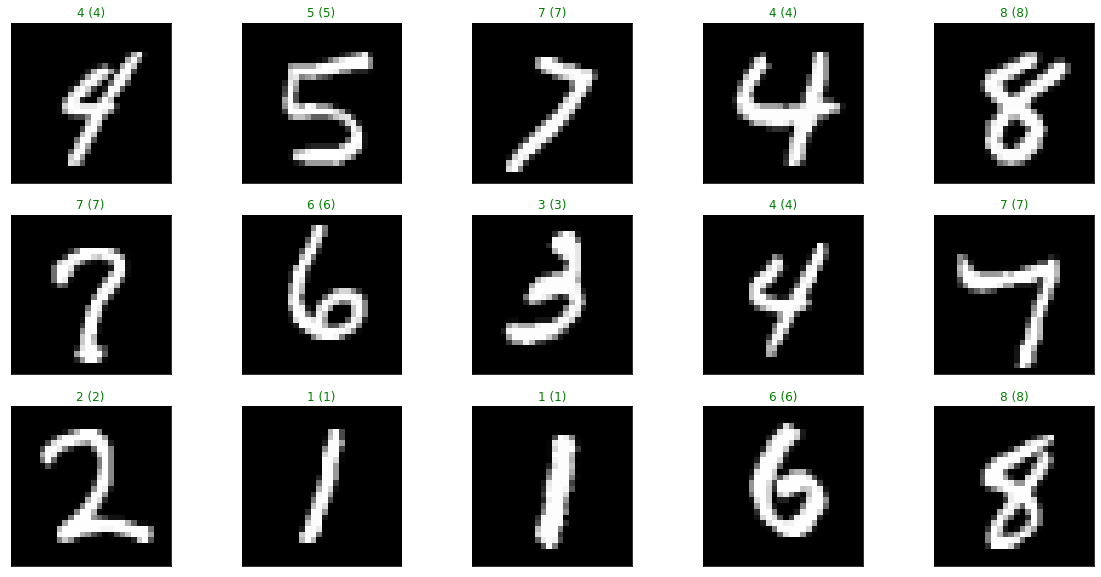

In [15]:
mnist_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

figure = plt.figure(figsize=(20, 10))

for i, index in enumerate(np.random.choice(test_x.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(test_x[index].reshape([28,-1])), cmap='gray' )
    
    predict_index = pred_test[index].argmax(axis=0)
    true_index = test_y[index].argmax(axis=0)
    # Set the title for each image
    ax.set_title(f"{mnist_labels[predict_index]} ({mnist_labels[true_index]})",
                 color=("green" if predict_index == true_index else "red"))

id = 2720
다음 그림은 숫자 9 입니다.
모델의 예측 : 4
모델의 카테고리별 확률 : [ 0.  0.  0.  0. 81.  0.  0.  1.  2. 13.]
틀렸어요


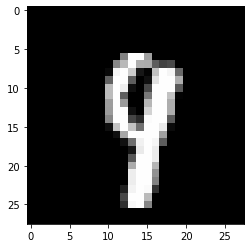

In [16]:
'''
틀린 것만 관찰해보자!

Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

true_false = (test_y.argmax(axis=1) == single_pred_test)
f_id = np.where(true_false == False)[0]
f_n = len(f_id)

id = f_id[rd.randrange(0,f_n)]

print(f'id = {id}' )
print(f'다음 그림은 숫자 {test_y.argmax(axis=1)[id]} 입니다.')
print(f'모델의 예측 : {single_pred_test[id]}')
print(f'모델의 카테고리별 확률 : {np.floor(pred_test[id]*100)}')

if test_y.argmax(axis=1)[id] == single_pred_test[id] :
    print('===============')
    print('정답입니다')
    print('===============')
else : 
    print('===============')
    print('틀렸어요')
    print('===============')

plt.imshow(test_x[id].reshape([28,-1]), cmap='gray')
plt.show()

In [17]:
model.evaluate(test_x, test_y)

313/313 [==============================] - 1s 2ms/step - loss: 0.2823 - accuracy: 0.9263


[0.2823317050933838, 0.9262999892234802]



---



## 모델링 II

1. Sequential, Functional 아무 것이나!
2. 히든레이어 3개 이상 쌓고, epochs=50 으로 성능 관찰.
3. activation, loss 설정
4. Early Stopping

In [32]:
from IPython.utils.terminal import restore_term_title
#########################
# 모델링 II : .fit( ) 까지!
#########################

# 1. 세션 클리어
keras.backend.clear_session()

# 2. 레이어 설정
il = keras.layers.Input(shape=(784, ))
h1 = keras.layers.Dense(512, activation='relu')(il)
h2 = keras.layers.Dense(512, activation='relu')(h1)
h3 = keras.layers.Dense(512, activation='relu')(h2)
h4 = keras.layers.Dense(512, activation='relu')(h3)
ol = keras.layers.Dense(10, activation='softmax')(h4)

# 3. 모델 생성
model = keras.models.Model(il, ol)

# 4. 모델 컴파일
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# 5. early stopping
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss',
                   min_delta=0,
                   patience=5,
                   verbose=1,
                   restore_best_weights=True)

# 5. 모델 학습
model.fit(train_x, train_y, validation_split=0.2, callbacks=[es], epochs=50, verbose=1)

Epoch 1/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2328 - accuracy: 0.9303 - val_loss: 0.1230 - val_accuracy: 0.9651
Epoch 2/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1117 - accuracy: 0.9675 - val_loss: 0.1193 - val_accuracy: 0.9666
Epoch 3/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0816 - accuracy: 0.9765 - val_loss: 0.1031 - val_accuracy: 0.9730
Epoch 4/50
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0653 - accuracy: 0.9818 - val_loss: 0.0907 - val_accuracy: 0.9763
Epoch 5/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0562 - accuracy: 0.9839 - val_loss: 0.0945 - val_accuracy: 0.9760
Epoch 6/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0453 - accuracy: 0.9870 - val_loss: 0.1049 - val_accuracy: 0.9762
Epoch 7/50
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0398 - accuracy: 0.9883 - val_loss: 0.1320 - val_accuracy:

In [33]:
pred_train = model.predict(train_x)
pred_test = model.predict(test_x)

single_pred_train = pred_train.argmax(axis=1)
single_pred_test = pred_test.argmax(axis=1)

logi_train_accuracy = accuracy_score(train_y.argmax(axis=1), single_pred_train)
logi_test_accuracy = accuracy_score(test_y.argmax(axis=1), single_pred_test)

print('트레이닝 정확도 : {:.2f}%'.format(logi_train_accuracy*100))
print('테스트 정확도 : {:.2f}%'.format(logi_test_accuracy*100))

트레이닝 정확도 : 98.59%
테스트 정확도 : 97.80%


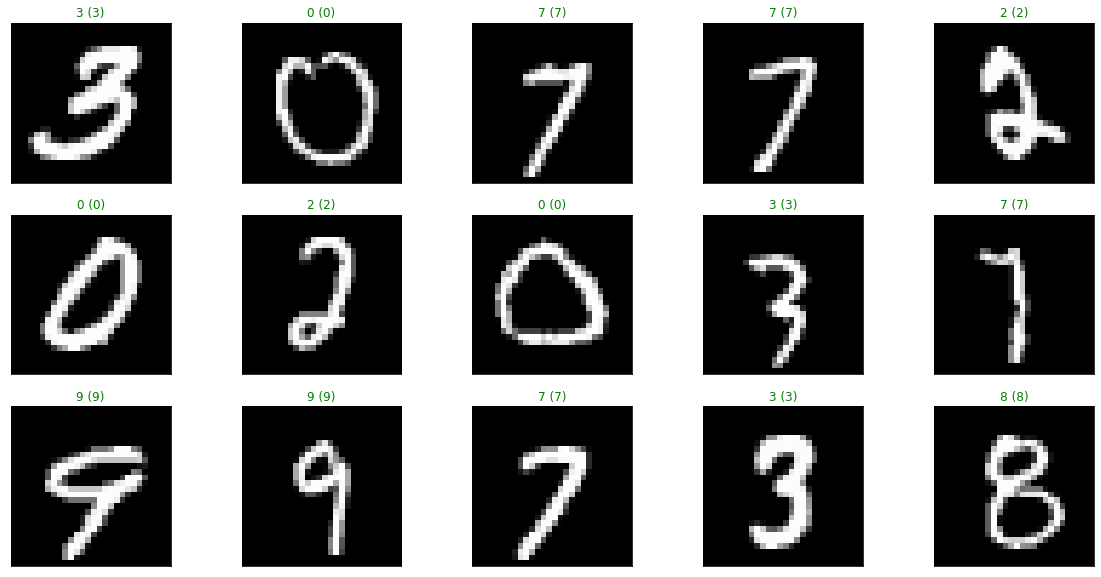

In [27]:
mnist_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

figure = plt.figure(figsize=(20, 10))

for i, index in enumerate(np.random.choice(test_x.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(test_x[index].reshape([28,-1])), cmap='gray' )
    
    predict_index = pred_test[index].argmax(axis=0)
    true_index = test_y[index].argmax(axis=0)
    # Set the title for each image
    ax.set_title(f"{mnist_labels[predict_index]} ({mnist_labels[true_index]})",
                 color=("green" if predict_index == true_index else "red"))

id = 8094
다음 그림은 숫자 2 입니다.
모델의 예측 : 1
모델의 카테고리별 확률 : [ 0. 60.  0.  0.  0.  0.  0.  0. 39.  0.]
틀렸어요


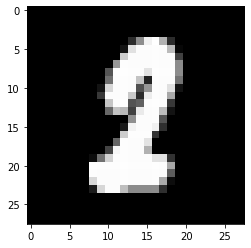

In [22]:
'''
틀린 것만 관찰해보자!

Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

true_false = (test_y.argmax(axis=1) == single_pred_test)
f_id = np.where(true_false == False)[0]
f_n = len(f_id)

id = f_id[rd.randrange(0,f_n)]

print(f'id = {id}' )
print(f'다음 그림은 숫자 {test_y.argmax(axis=1)[id]} 입니다.')
print(f'모델의 예측 : {single_pred_test[id]}')
print(f'모델의 카테고리별 확률 : {np.floor(pred_test[id]*100)}')

if test_y.argmax(axis=1)[id] == single_pred_test[id] :
    print('===============')
    print('정답입니다')
    print('===============')
else : 
    print('===============')
    print('틀렸어요')
    print('===============')

plt.imshow(test_x[id].reshape([28,-1]), cmap='gray')
plt.show()

In [28]:
model.evaluate(test_x, test_y)

313/313 [==============================] - 1s 3ms/step - loss: 0.1119 - accuracy: 0.9714


[0.1118960827589035, 0.9714000225067139]